In [114]:
import findspark
findspark.init()
import os
from datetime import datetime
from matplotlib import pyplot as plt
import pandas as pd
import matplotlib.dates as mdates
from matplotlib.pyplot import figure
from time import time 

In [2]:
# tylko do zapisania komendy, nie odpalać, bo kernel jest zajęty 
#! /usr/local/hbase/bin/hbase thrift

In [2]:
import hbspark
from pyspark.sql import SparkSession
from pyspark.sql.types import *

In [3]:
hbase_host_name = 'vl41.mini.pw.edu.pl'
spark_session = SparkSession.builder.appName('my-spark-app').master('local[1]').getOrCreate()
hbspark.connect('vl41.mini.pw.edu.pl', spark_session)

23/01/08 15:40:16 WARN util.Utils: Your hostname, node1 resolves to a loopback address: 127.0.0.1; using 192.168.137.191 instead (on interface ens3)
23/01/08 15:40:16 WARN util.Utils: Set SPARK_LOCAL_IP if you need to bind to another address
23/01/08 15:40:16 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


In [4]:
all_tables = hbspark.tables()
print(all_tables)

['f1', 'forecasts', 'trams', 'wifi']


In [5]:
forecasts = hbspark.table('forecasts')

In [6]:
forecasts.regions()

[{'start_key': '',
  'end_key': '',
  'id': 1673112154058,
  'name': 'forecasts,,1673112154058.eb49dadd7d82d16ecf1302b617ea20ab.',
  'version': 1,
  'server_name': 'node1',
  'port': 16020}]

In [7]:
df_orig = forecasts.scan()

In [8]:
df_orig.head(5)

[Row(airport:id_airport='123', airport:latitude_deg='63.985001', airport:longitude_deg='-22.6056', airport:name='Keflavik International Airport', date:dt='1673114400', date:tstamp='1673111545', rowkey='16731115451231673114400', weather:pop='1.0', weather:temp='265.8', weather:weather_description='light snow', weather:wind_speed='11.11'),
 Row(airport:id_airport='123', airport:latitude_deg='63.985001', airport:longitude_deg='-22.6056', airport:name='Keflavik International Airport', date:dt='1673125200', date:tstamp='1673111545', rowkey='16731115451231673125200', weather:pop='0.69', weather:temp='266.12', weather:weather_description='light snow', weather:wind_speed='11.02'),
 Row(airport:id_airport='123', airport:latitude_deg='63.985001', airport:longitude_deg='-22.6056', airport:name='Keflavik International Airport', date:dt='1673136000', date:tstamp='1673111545', rowkey='16731115451231673136000', weather:pop='0.59', weather:temp='266.53', weather:weather_description='light snow', weath

In [9]:
df_renamed = df_orig.withColumnRenamed("airport:id_airport","id_airport")\
.withColumnRenamed("airport:name","name").withColumnRenamed("airport:latitude_deg","latitude_deg")\
.withColumnRenamed("airport:longitude_deg","longitude_deg").withColumnRenamed("weather:temp","temp")\
.withColumnRenamed("weather:description","description").withColumnRenamed("weather:wind_speed","wind_speed")\
.withColumnRenamed("weather:pop","pop").withColumnRenamed("date:dt","dt").withColumnRenamed("date:tstamp","tstamp")

In [10]:
df = df_renamed.withColumn("id_airport", df_renamed.id_airport.cast(IntegerType()))\
.withColumn("latitude_deg",df_renamed.latitude_deg.cast(FloatType()))\
.withColumn("longitude_deg",df_renamed.longitude_deg.cast(FloatType()))\
.withColumn("temp",df_renamed.temp.cast(FloatType()))\
.withColumn("wind_speed",df_renamed.wind_speed.cast(FloatType()))\
.withColumn("pop", df_renamed.pop.cast(FloatType()))\
.withColumn("dt",df_renamed.dt.cast(LongType()))\
.withColumn("tstamp",df_renamed.tstamp.cast(LongType()))

In [11]:
df.head(5)

[Row(id_airport=123, latitude_deg=63.98500061035156, longitude_deg=-22.605600357055664, name='Keflavik International Airport', dt=1673114400, tstamp=1673111545, rowkey='16731115451231673114400', pop=1.0, temp=265.79998779296875, weather:weather_description='light snow', wind_speed=11.109999656677246),
 Row(id_airport=123, latitude_deg=63.98500061035156, longitude_deg=-22.605600357055664, name='Keflavik International Airport', dt=1673125200, tstamp=1673111545, rowkey='16731115451231673125200', pop=0.6899999976158142, temp=266.1199951171875, weather:weather_description='light snow', wind_speed=11.020000457763672),
 Row(id_airport=123, latitude_deg=63.98500061035156, longitude_deg=-22.605600357055664, name='Keflavik International Airport', dt=1673136000, tstamp=1673111545, rowkey='16731115451231673136000', pop=0.5899999737739563, temp=266.5299987792969, weather:weather_description='light snow', wind_speed=10.670000076293945),
 Row(id_airport=123, latitude_deg=63.98500061035156, longitude_

In [12]:
df.groupBy(["id_airport", "tstamp"]).avg("temp").collect()

[Row(id_airport=4060, tstamp=1673111545, avg(temp)=282.11650161743165),
 Row(id_airport=6506, tstamp=1673111545, avg(temp)=256.75674934387206),
 Row(id_airport=4342, tstamp=1673111545, avg(temp)=278.92675094604493),
 Row(id_airport=2434, tstamp=1673111545, avg(temp)=281.06574935913085),
 Row(id_airport=4461, tstamp=1673111545, avg(temp)=288.4685005187988),
 Row(id_airport=4427, tstamp=1673111545, avg(temp)=288.7850006103516),
 Row(id_airport=4035, tstamp=1673111545, avg(temp)=287.45475006103516),
 Row(id_airport=4617, tstamp=1673111545, avg(temp)=278.446248626709),
 Row(id_airport=4020, tstamp=1673111545, avg(temp)=283.26200103759766),
 Row(id_airport=2461, tstamp=1673111545, avg(temp)=280.5440017700195),
 Row(id_airport=2578, tstamp=1673111545, avg(temp)=273.9582489013672),
 Row(id_airport=4226, tstamp=1673111545, avg(temp)=279.84325180053713),
 Row(id_airport=2542, tstamp=1673111545, avg(temp)=278.66624908447267),
 Row(id_airport=4386, tstamp=1673111545, avg(temp)=278.1344985961914),

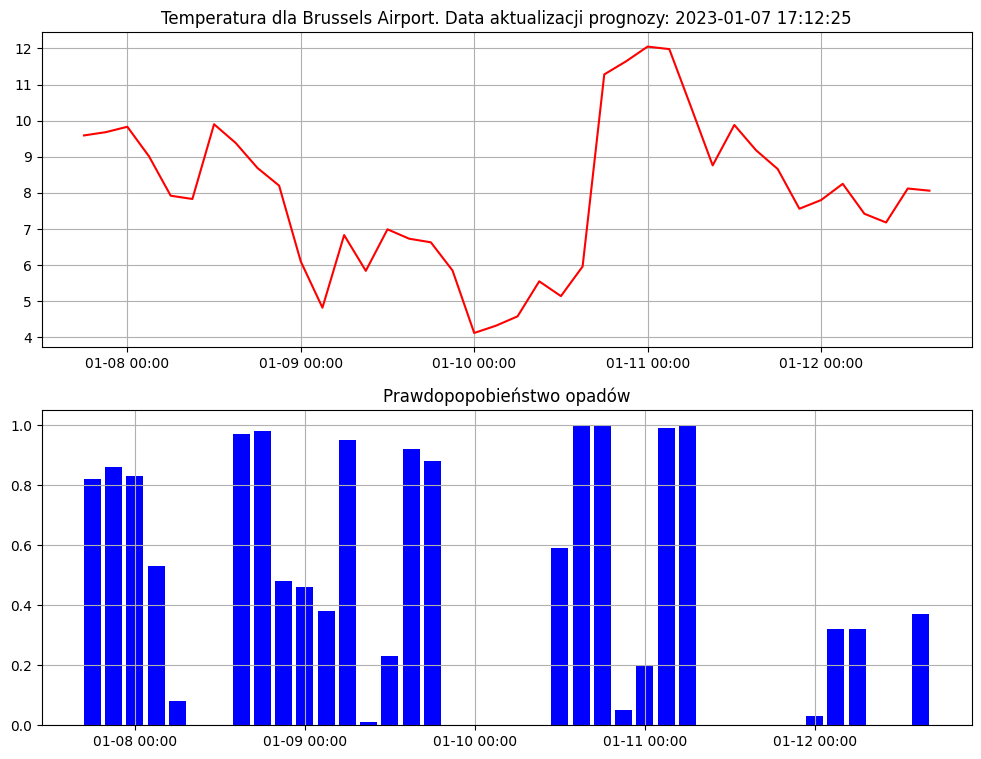

In [121]:
airport_id = 2155


df_filtered = df.filter(df.id_airport == airport_id)
max_tstamp = df.agg({"tstamp": "max"}).collect()[0][0]
df_filtered = df_filtered.filter(df_filtered.tstamp == max_tstamp).toPandas()
time_of_forecast = str(datetime.fromtimestamp(df_filtered.tstamp[0]))
name = df_filtered.name[0]
dates = pd.to_datetime(df_filtered['dt'],unit='s')


fig, axs = plt.subplots(2, figsize=(12,9))
axs[0].plot(dates, df_filtered.temp-273.15, 'red')
height =  axs[0].get_ylim()[1]-axs[0].get_ylim()[0]
bar = axs[1].bar(dates, df_filtered['pop'], bottom=axs[1].get_ylim()[0], width=0.1,  color='blue')
myFmt = mdates.DateFormatter('%m-%d %H:%M')
axs[0].xaxis.set_major_formatter(myFmt)
axs[0].grid()
axs[1].xaxis.set_major_formatter(myFmt)
axs[1].grid()
axs[0].set_title(f"Temperatura dla {name}. Data aktualizacji prognozy: {time_of_forecast}");
axs[1].set_title(f"Prawdopopobieństwo opadów");
plt.savefig(f'/home/vagrant/Project/for_hdfs/temp_plot_{str(int(time()/1000))}.png', bbox_inches='tight')
plt.show()

+ wykres dla danego lotniska(x - daty, y - temp i opady)
+ średnia z ostatniego miesiąca zapisana do hadoopa 

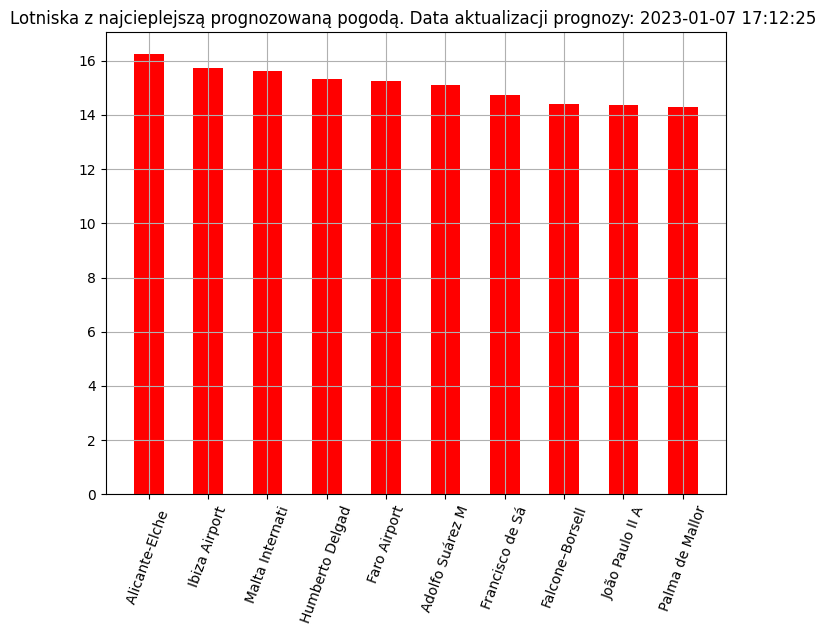

In [122]:
df_future = df.filter(df['dt'] > int(datetime.timestamp(datetime.now())/1000))
max_tstamp = df_future.agg({"tstamp": "max"}).collect()[0][0]
time_of_forecast = str(datetime.fromtimestamp(max_tstamp))
airports_by_temp = df_future.groupBy("name").agg({"temp":"avg", "pop":'avg'}).toPandas()
airports_by_temp.columns = ['name', 'rain prop', 'temp' ]
airports_by_temp_top = airports_by_temp.sort_values('temp', ascending=False).head(10)

fig, axs = plt.subplots(1, figsize=(8,6))
axs.bar(range(len(airports_by_temp_top)), airports_by_temp_top.temp-273.15, width=0.5,  color='red')
axs.set_xticks(range(len(airports_by_temp_top))) 
axs.set_xticklabels(airports_by_temp_top.name.str[0:15], rotation=70)
axs.grid()
axs.set_title(f'Lotniska z najcieplejszą prognozowaną pogodą. Data aktualizacji prognozy: {time_of_forecast} ')
plt.savefig(f'/home/vagrant/Project/for_hdfs/top_temp_{str(int(time()/1000))}.png', bbox_inches='tight')

In [113]:
int(datetime.timestamp(datetime.now())/1000)

1673200

In [116]:
str(int(time()/1000))

'1673200'